In [1]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('LabeledScoredTweets.csv')

In [3]:
tweet_text = ' '.join(data['Content'])

In [29]:
custom_stopwords = ['https', 't', 'co', 'will', 'US', 'U','via', 'bank', 'S', 'Reuters', 'Inflation', 'say', 'says', 'Full Story', 'China', 'Full story', 'Full  story']

stopwords = set(STOPWORDS).union(custom_stopwords)

In [30]:
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(tweet_text)


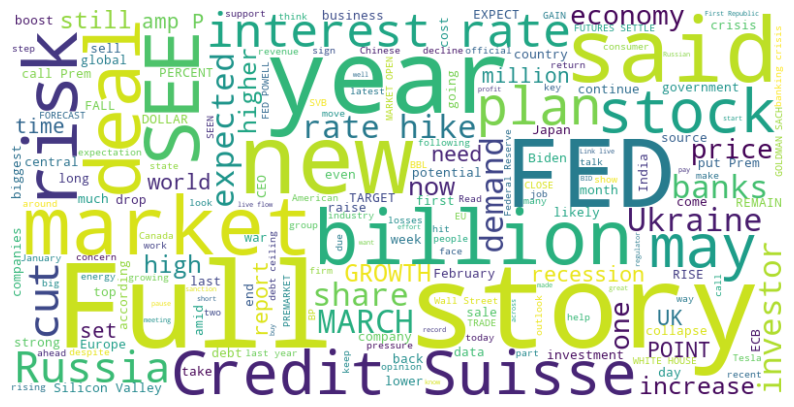

In [31]:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

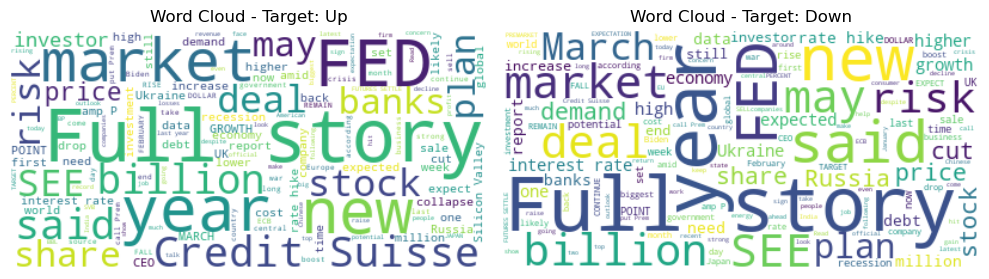

In [32]:
up_data = data[data['Target'] == 'Up']
down_data = data[data['Target'] == 'Down']
up_content = up_data['Content'].tolist()
down_content = down_data['Content'].tolist()
up_wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(' '.join(up_content))
down_wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(' '.join(down_content))
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(up_wordcloud, interpolation='bilinear')
plt.title('Word Cloud - Target: Up')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(down_wordcloud, interpolation='bilinear')
plt.title('Word Cloud - Target: Down')
plt.axis('off')

plt.tight_layout()
plt.show()

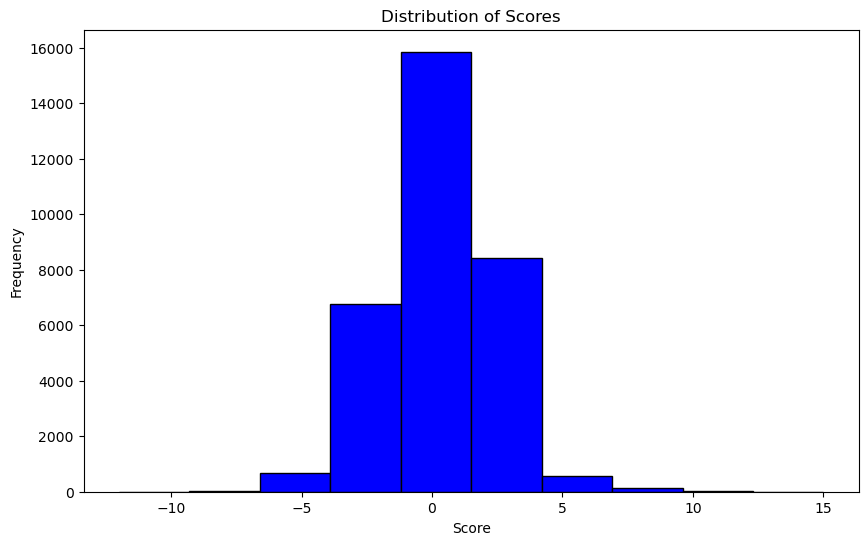

In [8]:
data = pd.read_csv('LabeledScoredTweets.csv')

# Extract the scores from the data
scores = data['Score']

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(scores, bins=10, color='blue', edgecolor='black')

# Customize the plot
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Scores')

# Display the histogram
plt.show()

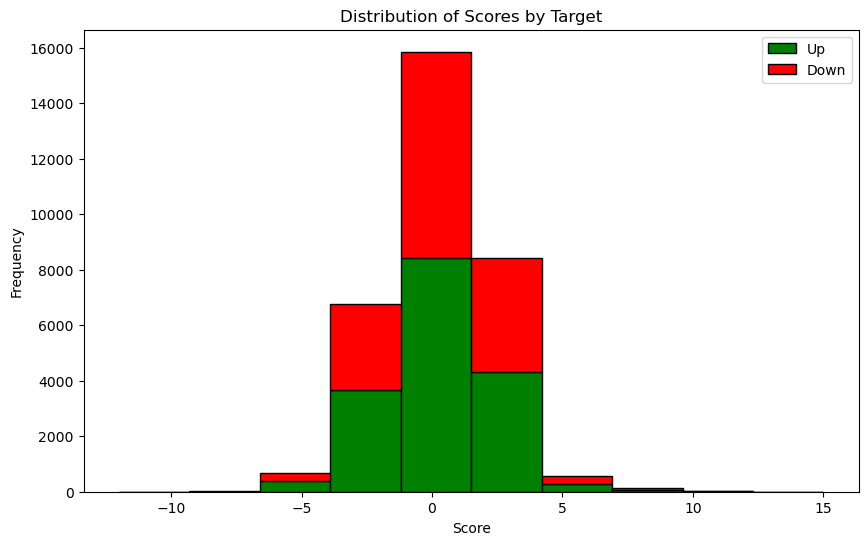

In [9]:
# Extract the scores for 'up' and 'down' targets
scores_up = data.loc[data['Target'] == 'Up', 'Score']
scores_down = data.loc[data['Target'] == 'Down', 'Score']

# Create a stacked histogram
plt.figure(figsize=(10, 6))
plt.hist([scores_up, scores_down], bins=10, color=['green', 'red'], edgecolor='black', stacked=True)

# Customize the plot
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Scores by Target')
plt.legend(['Up', 'Down'])

# Display the histogram
plt.show()

          count      mean       std   min  25%  50%  75%   max
Target                                                        
Down    15247.0  0.214468  2.128384 -12.0 -1.0  1.0  2.0  15.0
Up      17185.0  0.145010  2.126945 -12.0 -1.0 -1.0  2.0  15.0


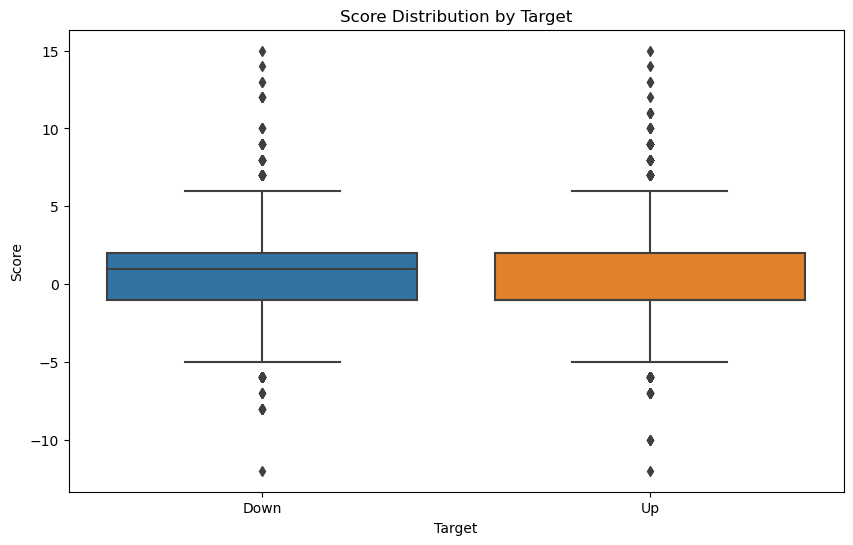

T-statistic: -2.934332934430523
p-value: 0.003344996287027796


In [10]:
# Load the tweet data into a DataFrame


# Analyze the relationship using summary statistics
summary_stats = data.groupby('Target')['Score'].describe()
print(summary_stats)

# Create a box plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.boxplot(x='Target', y='Score', data=data)
plt.xlabel('Target')
plt.ylabel('Score')
plt.title('Score Distribution by Target')
plt.show()

# Perform a t-test to determine if there is a significant difference in scores between 'up' and 'down'
score_up = data.loc[data['Target'] == 'Up', 'Score']
score_down = data.loc[data['Target'] == 'Down', 'Score']
t_stat, p_value = ttest_ind(score_up, score_down)
print("T-statistic:", t_stat)
print("p-value:", p_value)

In [12]:
tweets = data['Content'].tolist()

# Create an instance of CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the tweets
bag_of_words = vectorizer.fit_transform(tweets)

# Convert the bag of words to a DataFrame
bag_of_words_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())

# Display the bag of words DataFrame
print(bag_of_words_df)

MemoryError: Unable to allocate 12.2 GiB for an array with shape (32432, 50482) and data type int64

In [13]:
tweets = data['Content'].tolist()
targets = data['Target'].tolist()

# Create an instance of CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the tweets to obtain the Bag of Words representation
bag_of_words = vectorizer.fit_transform(tweets)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(bag_of_words, targets, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.611530753815323


C:\Users\omnip\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\omnip\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [15]:
tweets = data['Content'].tolist()

# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Perform sentiment analysis on each tweet
sentiment_scores = []
for tweet in tweets:
    sentiment = sia.polarity_scores(tweet)
    sentiment_scores.append(sentiment)

# Convert the sentiment scores to a DataFrame
sentiment_df = pd.DataFrame(sentiment_scores)

# Display the sentiment scores DataFrame
print(sentiment_df)

         neg    neu    pos  compound
0      0.234  0.734  0.032   -0.8819
1      0.000  0.832  0.168    0.6874
2      0.148  0.752  0.100   -0.3400
3      0.153  0.743  0.104   -0.3400
4      0.256  0.667  0.077   -0.8885
...      ...    ...    ...       ...
32427  0.000  0.705  0.295    0.9282
32428  0.108  0.746  0.146    0.1363
32429  0.055  0.656  0.289    0.8360
32430  0.139  0.727  0.133   -0.0772
32431  0.000  0.725  0.275    0.9491

[32432 rows x 4 columns]


In [16]:
from sklearn.metrics import confusion_matrix

# Make predictions on the test set
predictions = model.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[1665 1370]
 [1150 2302]]


In [17]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision
precision = precision_score(y_test, predictions, average='binary', pos_label='Up')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, predictions, average='binary', pos_label='Up')
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, predictions, average='binary', pos_label='Up')
print("F1 Score:", f1)

Precision: 0.6269063180827886
Recall: 0.6668597914252608
F1 Score: 0.6462661426165075


In [18]:
# Calculate precision
precision = precision_score(y_test, predictions, average='binary', pos_label='Down')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, predictions, average='binary', pos_label='Down')
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, predictions, average='binary', pos_label='Down')
print("F1 Score:", f1)

Precision: 0.5914742451154529
Recall: 0.5485996705107083
F1 Score: 0.5692307692307692


In [19]:
documents = data['Content'].tolist()
targets = data['Target'].tolist()


In [20]:
vectorizer = CountVectorizer()

# Fit and transform the documents to obtain the Bag of Words representation
bag_of_words = vectorizer.fit_transform(documents)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(bag_of_words, targets, test_size=0.2, random_state=42)


classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Predict the categories for the test set
predictions = classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.6189301680283644
